### UAS PMPM Alexnet
- Ri'an
- 220711842
- Keras
- Cabai (Rawit, Keriting, Hijau)
- Alexnet


In [45]:
#Import library
import os
import numpy as np

#Import library tensorflow dan modul keras yang diperlukan
import tensorflow as tf
from tensorflow.keras import layers 
from tensorflow.keras.preprocessing.image import load_img, ImageDataGenerator
from tensorflow.keras.models import Sequential, load_model 
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Dropout, Flatten

#Penjelasan
# layers digunakan untuk menambahkan lapisan ke dalam model
# load_img digunakan untuk memuat gambar
# ImageDataGenerator digunakan untuk melakukan augmentasi pada gambar
# Sequential digunakan untuk membuat model secara berurutan
# Conv2D digunakan untuk membuat lapisan konvolusi
# MaxPooling2D digunakan untuk melakukan pooling pada lapisan konvolusi
# Dense digunakan untuk membuat lapisan fully connected
# Dropout digunakan untuk menghindari overfitting
# Flatten digunakan untuk membuat lapisan menjadi flat (rata) menjadi vektor 1 dimensi


In [46]:
count = 0 #digunakan untuk menghitung jumlah gambar
dirs = os.listdir(r'D:\equalized\train_data')
for dir in dirs:
    files = list(os.listdir(r'D:\equalized\train_data/'+dir))
    print(dir + ' Folder has ' + str(len(files)) + ' Images')
    count = count + len(files)
print('Images Folder has ' + str(count) + ' Images')

Hijau Folder has 100 Images
Keriting Folder has 100 Images
Rawit Folder has 100 Images
Images Folder has 300 Images


In [47]:
# Parameter
base_dir = r'D:\equalized\train_data' #direktori folder dataset
img_size = 224 #mengubah ukuran gambar menjadi 180
batch = 32 #jumlah sample (gambar) yang akan diproses pada satu kali iterasi
validation_split = 0.1 #data pelatihan yang akan digunakan sebagai data validasi

- Memasukkan parameter yang telah di definisikan tadi untuk membuat dataset dari gambar di direktori


In [48]:
dataset = tf.keras.utils.image_dataset_from_directory(
    base_dir, #path direktori, subfolder dianggap sebagai label
    seed=123, #untuk memastikan proses pemisahan data selalu konsisten (random_state)
    image_size=(img_size, img_size), #ukuran gambar diubah (resize) menjadi 180x180 pixel
    batch_size=batch, #jumlah gambar yang akan dikelompokkan 
)

Found 300 files belonging to 3 classes.


In [49]:
#mendapatkan nama kelas dari dataset 
class_names = dataset.class_names #dataset.class_names akan mengambil daftar nama kelas berdasarkan subfolder di dalam direktori
print("Class Names:", class_names)

Class Names: ['Hijau', 'Keriting', 'Rawit']


In [50]:
###Terdapat code yang hilang disini! lihat modul untuk menemukanya menghitung jumlah gambar untuk train
total_count = len(dataset)
val_count = int(total_count * validation_split)
train_count = total_count - val_count

print("Total Images:", total_count)
print("Train Images:", train_count)
print("Validation Images:", val_count)

Total Images: 10
Train Images: 9
Validation Images: 1


In [51]:
###Terdapat code yang hilang disini! lihat modul untuk menemukanya
#Cell ini untuk membagi dataset bang

train_ds = dataset.take(train_count)
val_ds = dataset.skip(train_count)

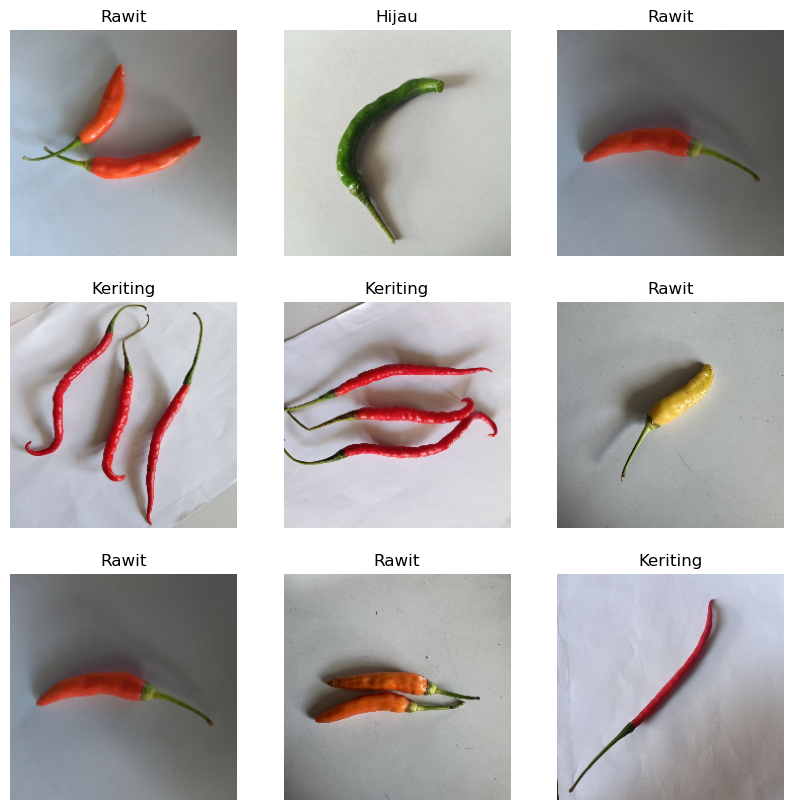

In [52]:
import matplotlib.pyplot as plt

i = 0
plt.figure(figsize=(10,10)) #membuat figure dengan ukuran 10x10 inchi untuk menampilkan gambar

###Terdapat code yang hilang disini! lihat modul untuk menemukanya
for images, labels in train_ds.take(1): #mengambil 1 batch pertama dari train_ds
    for i in range(9):
        plt.subplot(3,3, i+1) #menyiapkan subplot dengan grid 3x3 dan menempatkan gambar pada posisi i+1
        plt.imshow(images[i].numpy().astype('uint8')) #menampilkan gambar dan mengonversi ke tipe uint8
        plt.title(class_names[labels[i]]) #menampilkan judul gambar sesuai dengan nama kelas
        plt.axis('off') #menonaktifkan sumbu pada gambar agar tidak terlihat

In [53]:
import numpy as np

# Tampilkan gambar dengan shape (32, 180, 180, 3)
for images, labels in train_ds.take(1):
    images_array = np.array(images)
    print(images_array.shape)  # Output: (32, 180, 180, 3)
    #32: Jumlah gambar dalam batch.
    #180: Lebar gambar dalam piksel
    #180: Tinggi gambar dalam piksel
    #3: Jumlah channel gambar (RGB)

(32, 224, 224, 3)


In [54]:
#Mengatur AUTOTUNE untuk pemrosesan data otomatis oleh tensorflow
#AUTOTUNE digunakan untuk memungkinkan tensorflow mengoptimalkan jumlah thread secara otomatis saat memproses data
AUTOTUNE = tf.data.AUTOTUNE

In [55]:
#mengoptimalkan dataset pelatihan (train_ds)
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size = AUTOTUNE)
#cache digunakan untuk menyimpan dataser di memori agar lebih cepat diakses
#shuffle mengacak data dalam batch agar model tidak terlalu terlatih pada urutan tertentu
#prefetch untuk menyiapkan data batch berikutnya secara otomatis

In [56]:
#mengoptimalkan dataset validasi (val_ds) 
val_ds = val_ds.cache().shuffle(1000).prefetch(buffer_size = AUTOTUNE)

In [57]:
data_augmentation = Sequential([
    layers.RandomFlip("horizontal", input_shape = (img_size,img_size,3)), #membalik gambar secara horizontal
    layers.RandomRotation(0.1), #merotasi gambar secara acak dalam kisaran 0°-36° (0.1 * 360)
    layers.RandomZoom(0.1) #melakukan zoom in/zoom out secara acak dengan rentang 10%
])

d:\anaconda3\Lib\site-packages\keras\src\layers\preprocessing\tf_data_layer.py:19: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


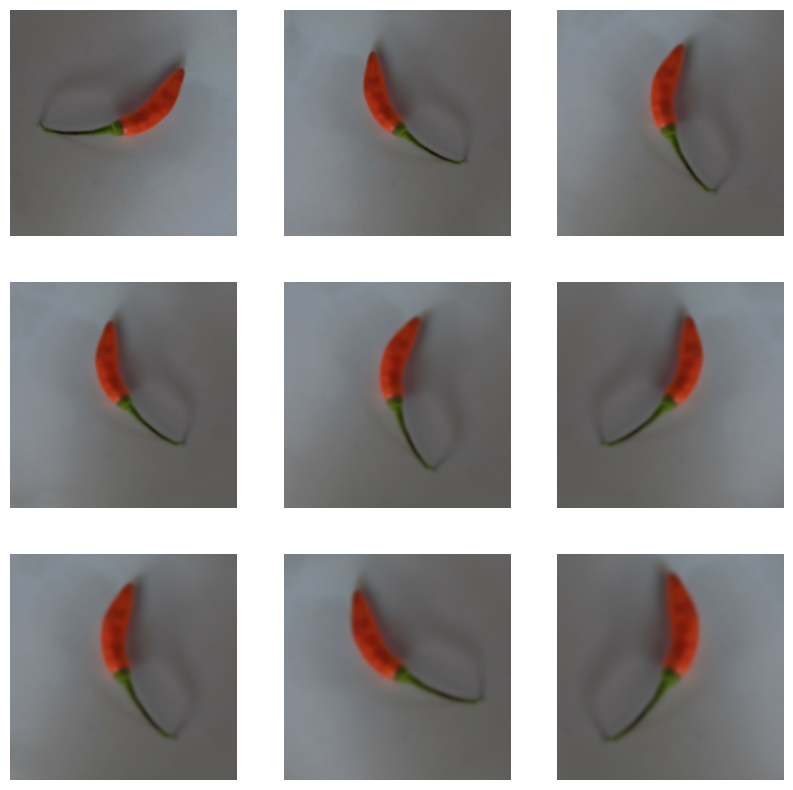

In [58]:
#sama seperti sebelumnya, code ini digunakan untuk menampilkan gambar dari data_augmentation
i = 0
plt.figure(figsize=(10,10))

for images, labels in train_ds.take(1):
    for i in range(9):
        images = data_augmentation(images)
        plt.subplot(3,3, i+1)
        plt.imshow(images[0].numpy().astype('uint8'))
        plt.axis('off')

In [59]:
from tensorflow.keras import layers, Sequential

def create_alexnet(input_shape, num_classes):
    model = Sequential([
        layers.Conv2D(96, kernel_size=(11, 11), strides=4, activation='relu', input_shape=input_shape),
        layers.MaxPooling2D(pool_size=(3, 3), strides=2),
        layers.Conv2D(256, kernel_size=(5, 5), activation='relu', padding='same'),
        layers.MaxPooling2D(pool_size=(3, 3), strides=2),
        layers.Conv2D(384, kernel_size=(3, 3), activation='relu', padding='same'),
        layers.Conv2D(384, kernel_size=(3, 3), activation='relu', padding='same'),
        layers.Conv2D(256, kernel_size=(3, 3), activation='relu', padding='same'),
        layers.MaxPooling2D(pool_size=(3, 3), strides=2),
        layers.Flatten(),
        layers.Dense(4096, activation='relu'),
        layers.Dropout(0.5),
        layers.Dense(4096, activation='relu'),
        layers.Dropout(0.5),
        layers.Dense(num_classes, activation='softmax')
    ])
    return model

# Contoh penggunaan
img_size = 224  # Misalnya
input_shape = (img_size, img_size, 3)
num_classes = len(class_names)  # Jumlah kelas yang Anda miliki

alexnet_model = create_alexnet(input_shape, num_classes)


d:\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [60]:
from tensorflow.keras.optimizers import Adam #untuk mengoptimalkan proses pelatihan model

#mengkompilasi model dengan optimizer, loss function, dan metrics
alexnet_model.compile(
    optimizer=Adam(learning_rate=1e-4), #menggunakan optimizer Adam dengan learning rate 0.0001
    loss='sparse_categorical_crossentropy', #untuk klasifikasi multi-kelas
    metrics=['accuracy'] #akurasi digunakan sebagai metrik evaluasi
)


In [61]:
#menampilkan ringkasan dari model
alexnet_model.summary()

Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_10 (Conv2D)              │ (None, 54, 54, 96)     │        34,944 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_6 (MaxPooling2D)  │ (None, 26, 26, 96)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_11 (Conv2D)              │ (None, 26, 26, 256)    │       614,656 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_7 (MaxPooling2D)  │ (None, 12, 12, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_12 (Conv2D)              │ (None, 12, 12, 384)    │       885,120 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_13 (Conv2D)              │ (None, 12, 12, 384)    │     1,327,488 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_14 (Conv2D)              │ (None, 12, 12, 256)    │       884,992 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_8 (MaxPooling2D)  │ (None, 5, 5, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_2 (Flatten)             │ (None, 6400)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 4096)           │    26,218,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 4096)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 4096)           │    16,781,312 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ (None, 4096)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 3)              │        12,291 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 46,759,299 (178.37 MB)

 Trainable params: 46,759,299 (178.37 MB)

 Non-trainable params: 0 (0.00 B)

In [62]:
#early stopping digunakan untuk menghentikan pelatihan lebih awal jika model tidak ada peningkatan
from tensorflow.keras.callbacks import EarlyStopping

#Ada fungsi early stopping disini, jangan keskip tuan :D
early_stopping = EarlyStopping(monitor='val_accuracy',
                               patience=3,
                               mode='max')
#melatih model menggunakan data latih dan validasi dengan early stopping
history= alexnet_model.fit(train_ds, #data pelatihan yang telah disiapkan
                   epochs=30, # jumlah maksimal epoch
                   validation_data=val_ds,  #data validasi untuk mengevaluasi model pada setiap epoch
                   callbacks=[early_stopping]) #menambahkan early stopping ke dalam callback untuk pelatihan

Epoch 1/30
9/9 ━━━━━━━━━━━━━━━━━━━━ 10s 826ms/step - accuracy: 0.3171 - loss: 12.6633 - val_accuracy: 0.4167 - val_loss: 1.6458
Epoch 2/30
9/9 ━━━━━━━━━━━━━━━━━━━━ 8s 852ms/step - accuracy: 0.4081 - loss: 1.9028 - val_accuracy: 0.9167 - val_loss: 0.3998
Epoch 3/30
9/9 ━━━━━━━━━━━━━━━━━━━━ 8s 896ms/step - accuracy: 0.6249 - loss: 0.8143 - val_accuracy: 1.0000 - val_loss: 0.1700
Epoch 4/30
9/9 ━━━━━━━━━━━━━━━━━━━━ 8s 885ms/step - accuracy: 0.8572 - loss: 0.3739 - val_accuracy: 1.0000 - val_loss: 0.0398
Epoch 5/30
9/9 ━━━━━━━━━━━━━━━━━━━━ 8s 858ms/step - accuracy: 0.9284 - loss: 0.2062 - val_accuracy: 1.0000 - val_loss: 0.0021
Epoch 6/30
9/9 ━━━━━━━━━━━━━━━━━━━━ 8s 844ms/step - accuracy: 0.9763 - loss: 0.0650 - val_accuracy: 1.0000 - val_loss: 0.0014


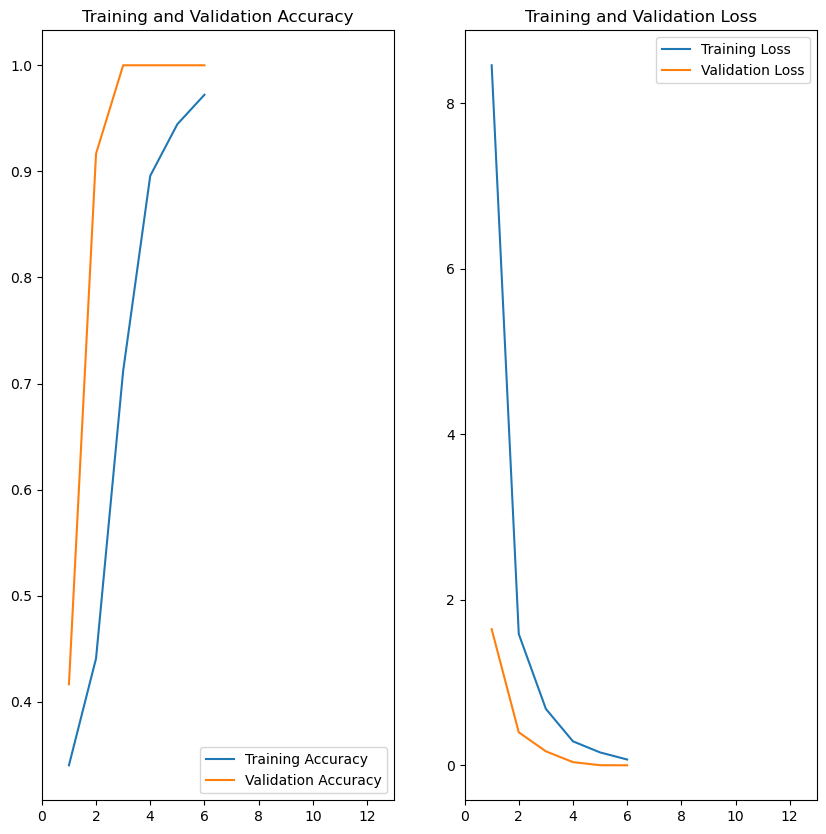

In [63]:
#membuat range untuk epoch berdasarkan panjang data loss dari pelatihan
ephocs_range = range(1, len(history.history['loss']) + 1)

plt.figure(figsize=(10, 10)) #membuat figure dengan ukuran 10x10 untuk menampilkan 2 grafik (Training and Validation Accuracy dan Loss)

#grafik pertama (Training and Validation Accuracy)
plt.subplot(1, 2, 1) #membuat subplot pertama dalam layout 1 baris dan 2 kolom
plt.plot(ephocs_range, history.history['accuracy'], label='Training Accuracy') #plot akurasi pelatihan 
plt.plot(ephocs_range, history.history['val_accuracy'], label='Validation Accuracy') #plot akurasi validasi
plt.legend(loc='lower right') #membuat legenda (informasi elemen visual) di sudut kanan bawah
plt.xlim(0, 13) #mengatur batas nilai pada sumbu x dari epoch 1 sampai 13
plt.title('Training and Validation Accuracy') #memberi judul grafik

#grafik kedua (Training and Validation Loss)
plt.subplot(1, 2, 2)
plt.plot(ephocs_range, history.history['loss'], label='Training Loss')
plt.plot(ephocs_range, history.history['val_loss'], label='Validation Loss')
plt.legend(loc='upper right')
plt.xlim(0, 13)
plt.title('Training and Validation Loss')
plt.show()

In [64]:
#menyimpan model yang telah dilatih
alexnet_model.save('model_alexnet.h5')

In [65]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import load_model
from PIL import Image

#memuat model yang sudah dilatih
alexnet_model = load_model(r'D:\equalized\model_alexnet.h5')  # Ganti dengan path model Anda
class_names = ['Hijau', 'Keriting', 'Rawit'] #kelas yang ada pada model

#fungsi untuk mengklasifikasikan gambar dan menyimpan gambar asli
def classify_images(image_path, save_path='predicted_image.jpg'):
    try:
        #memuat dan mempersiapkan gambar untuk prediksi
        input_image = tf.keras.utils.load_img(image_path, target_size=(224, 224)) #membuat gambar dari path dan mnegubah ukurannya menjadi 180x180 pixel
        input_image_array = tf.keras.utils.img_to_array(input_image) #mengubah gambar jadi array numpy agar bisa di proses model
        input_image_exp_dim = tf.expand_dims(input_image_array, 0)  #menambahkan dimensi batch agar sesuai dengan input model
                                                                    #dimensi menjadi (1, 180, 180, 3)

        #melakukan prediksi
        predictions = alexnet_model.predict(input_image_exp_dim) #melakukan prediksi pada gambar yang telah diproses
        result = tf.nn.softmax(predictions[0]) #menghitung hasil prediksi menggunakan softmax untuk mendapatkan probabilitas tiap kelas
        class_idx = np.argmax(result) #menemukan indeks kelas dengan probabilitas tertinggi
        confidence = np.max(result) * 100 #menghitung confidence dalam persentase

        #menampilkan hasil prediksi dan confidence
        print(f"Prediksi: {class_names[class_idx]}") #menampilkan nama kelas yang diprediksi 
        print(f"Confidence: {confidence:.2f}%") #menampilkan nilai confidence

        #menyimpan gambar asli tanpa teks
        input_image = Image.open(image_path) #membuka gambar yang ada di path
        input_image.save(save_path) #menyimpan gambar asli ke dalam path yang telah ditentukan

        return f"Prediksi: {class_names[class_idx]} dengan confidence {confidence:.2f}%. Gambar asli disimpan di {save_path}."
    except Exception as e:
        return f"Terjadi kesalahan: {e}"

#contoh penggunaan fungsi
###Terdapat code yang hilang disini! lihat modul untuk menemukanya


Found 59 files belonging to 3 classes.


1/2 ━━━━━━━━━━━━━━━━━━━━ 0s 450ms/stepWARNING:tensorflow:6 out of the last 6 calls to <function TensorFlowTrainer.make_predict_function.<locals>.one_step_on_data_distributed at 0x000002A5BAC440E0> triggered tf.function retracing. Tracing is expensive and the excessive number of tracings could be due to (1) creating @tf.function repeatedly in a loop, (2) passing tensors with different shapes, (3) passing Python objects instead of tensors. For (1), please define your @tf.function outside of the loop. For (2), @tf.function has reduce_retracing=True option that can avoid unnecessary retracing. For (3), please refer to https://www.tensorflow.org/guide/function#controlling_retracing and https://www.tensorflow.org/api_docs/python/tf/function for  more details.


2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 323ms/step


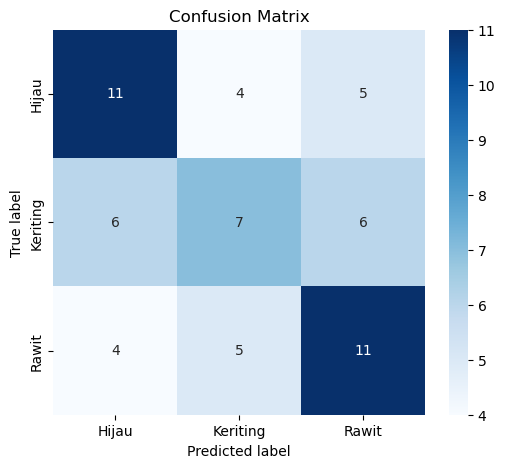

Confusion Matrix:
 [[11  4  5]
 [ 6  7  6]
 [ 4  5 11]]
Akurasi: 0.4915254237288136
Presisi: [0.52380952 0.4375     0.5       ]
Recall: [0.55       0.36842105 0.55      ]
F1 Score: [0.53658537 0.4        0.52380952]


In [66]:
import tensorflow as tf
from tensorflow.keras.models import load_model
import seaborn as sns
import matplotlib.pyplot as plt

#memuat model yang telah dilatih sebelumnya
alexnet_model = load_model(r'D:\equalized\model_alexnet.h5')#gunakan path masing masing ya

#memuat data test yang sebenarnya
test_data = tf.keras.preprocessing.image_dataset_from_directory(
    r'test_data', #direktori data uji
    labels='inferred', #label otomatis dari subfolder yang ada
    label_mode='categorical',  #menghasilkan label dalam bentuk one-hot encoding
    batch_size=32, #ukuran batch untuk pemrosesan
    image_size=(224, 224) #ukuran gambar yang akan diproses
)

#prediksi model
y_pred = alexnet_model.predict(test_data)
y_pred_class = tf.argmax(y_pred, axis=1)  #konversi ke kelas prediksi

#ekstrak label sebenarnya dari test_data dan konversi ke bentuk indeks kelas
true_labels = [] #menyimpan label asli dalam bentuk indeks
for _, labels in test_data:
    true_labels.extend(tf.argmax(labels, axis=1).numpy())  #konversi one-hot ke indeks kelas
true_labels = tf.convert_to_tensor(true_labels) #mengkonversi list ke tensor untuk perhitungan

#membuat confusion matrix untuk evaluasi
conf_mat = tf.math.confusion_matrix(true_labels, y_pred_class)

#menghitung akurasi berdasarkan confusion matrix
accuracy = tf.reduce_sum(tf.linalg.diag_part(conf_mat)) / tf.reduce_sum(conf_mat)

#mnghitung presisi dan recall dari confusion matrix
precision = tf.linalg.diag_part(conf_mat) / tf.reduce_sum(conf_mat, axis=0)
recall = tf.linalg.diag_part(conf_mat) / tf.reduce_sum(conf_mat, axis=1)

#menghitung F1 Score
f1_score = 2 * (precision * recall) / (precision + recall)

#visualisasi Confusion Matrix
plt.figure(figsize=(6, 5)) #mengatur ukuran gambar
sns.heatmap(conf_mat.numpy(), annot=True, fmt='d', cmap='Blues', #annot=True untuk menampilkan angka di dalam setiap sel matriks
                                                                 #fmt='d' untuk menampilkan bilangan bulat tanpa desimal
            xticklabels=["Hijau", "Keriting", "Rawit"], yticklabels=["Hijau", "Keriting", "Rawit"])
plt.title('Confusion Matrix')
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.show()

# Menampilkan hasil
print("Confusion Matrix:\n", conf_mat.numpy())
print("Akurasi:", accuracy.numpy())
print("Presisi:", precision.numpy())
print("Recall:", recall.numpy())
print("F1 Score:", f1_score.numpy())
